In [1]:
!pip install konlpy
!pip install sklearn
!pip install pyLDAvis

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=f16e6ef4576150f962e73c3110f6b004f211435ffc017fccf21cf0812f7545e5
  Stored in directory: c:\users\sangmin\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached Cython-0.29.28-py2.py3-none-any.whl (983 kB)
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=8436b72522df26b63846fa2224d5e8793d11ebf5289ae1b31cd117c459f01650
  Stored in directory: c:\users\sangmin\appdata\loca

In [2]:
from konlpy.tag import Kkma
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import numpy as np
from konlpy.tag import Okt
import re
import pprint
import os

In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [4]:
data = pd.read_csv('핀테크어플리뷰.csv')

In [5]:
data['내용']=data['내용'].apply(lambda x:re.sub(r"\d+", " ", x))

In [6]:
data.head(10)

,어플명,id,date,연,월,일,별점,이름,내용
0,토스,1,20220323,2022,3,23,2,HY,한국에서 이용하다가 해외 거주자라 다시 돌아왔는데요. 폰번호 해지되서 이용이 안됐어...
1,토스,2,20220104,2022,1,4,4,조은애,"업데이트 후 해외사용, 인증불가/ 안녕하세요. 토스를 몇 년 째 잘 사용해오고 있습..."
2,토스,3,20220518,2022,5,18,4,신세은,토스로 할수 있는 점 . 세 이하도 토스로 인터넷쇼핑 할수 있어요! . 카드로...
3,토스,4,20220520,2022,5,20,4,알탕,언제부턴가 앱을 열때 지문인식창이 두번 겹쳐나오는데 이럴땐 지문인식이 되지 않을때가...
4,토스,5,20220517,2022,5,17,5,뜨랑,토스 이자도 많이 주고 모으기 통장 있어서 너무 편리합니다 몇 가지 가능하면 좋을 ...
5,토스,6,20220505,2022,5,5,1,김지연,미션이 없어진 곳은 삭제를 제때에 삭제를 해주셔야 하지 않나요? 그리고 미션이 많이...
6,토스,7,20220510,2022,5,10,5,김상엽,토스 질사용하고잇습니다. 한가지 불편한점이 잇어서 글남김니다. 다름이 아닌 만보기에...
7,토스,8,20220527,2022,5,27,4,Soomin Lee,토스증권을 주로 이용중입니다.사용하다 작은 불편함이있어 올려봅니다^^; 내 보유주식...
8,토스,9,20220525,2022,5,25,5,재우권,너무 좋은 앱이다. 작은 금액이지만 이런 저런 조건 없이 확실하게 적립해 준다. 가...
9,토스,10,20220504,2022,5,4,3,00 AVOCADO,"토스 만보기의 가까운 주변 포인트 지점이 점점 없어지네요. - 주변에 편의점, 커피..."


In [23]:
data['내용']

0       한국에서 이용하다가 해외 거주자라 다시 돌아왔는데요. 폰번호 해지되서 이용이 안됐어...
1       업데이트 후 해외사용, 인증불가/ 안녕하세요. 토스를 몇 년 째 잘 사용해오고 있습...
2       토스로 할수 있는 점  .  세 이하도 토스로 인터넷쇼핑 할수 있어요!  . 카드로...
3       언제부턴가 앱을 열때 지문인식창이 두번 겹쳐나오는데 이럴땐 지문인식이 되지 않을때가...
4       토스 이자도 많이 주고 모으기 통장 있어서 너무 편리합니다 몇 가지 가능하면 좋을 ...
                              ...                        
4461    대출이자는 처음엔 싸다가 슬금슬금 올려서 딴은행보다 비싸고 예금금리는 제일 낮고 별...
4462                                     수수료 없고 편리한 카뱅 최고
4463    거지같은앱 신분증사진요구하고 권한사항미동의시 사용불가능 개인정보 빼가려는 듯한 사기앱같음
4464                                       매우 편리하고 유용합니다.
4465                                업뎃후 너무 불편합니다. 개선해주세요.
Name: 내용, Length: 4466, dtype: object

In [22]:
import konlpy
import re

# tokenization 함수를 만들어둠
def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)  ## ,.?!와 문자+숫자+_(\w)와 공백(\s)만 남김  # 앞에 r을 붙여주면 deprecation warning이 안뜸 (raw string으로 declare)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)   # stem=True로 설정하면 동사원형으로 바꿔서 return
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Adjective' or pos == 'Verb' or pos == 'Noun':  # 이 경우에는 형용사, 동사, 명사만 남김
            words.append(word)

    words_str = ' '.join(words)
    return words_str


# review_df['Content']를 하나씩 tokenize해서 list로 저장
tokenized_list = []

for text in data['내용']:
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list)

4466
['한국 이용 하다가 해외 거주 자라 다시 돌아왔는데요 폰 번호 해지 되서 이용 됐어요 문의 넣어도 한국 폰 번호 없으면 이용 안된다고 짤 말씀 하시길래 일부러 한국 유심 카드 사서 미국 우편 받았습니다 본인 인증 문자 받아서 진행 하려는데 본인 인증 전화 해야 되네요 왜 하는거죠 해외 살 한국 유심 칩 있어도 국제 전화 수신 안되거든요 문자 인증 하면 됐지 진짜 거 때문 약정 걸어서 유심 샀는데 짜증나서 미치겠습니다', '업데이트 후 해외 사용 인증 불가 안녕하세요 토스 몇 년 째 잘 사용 해오고 있습니다 이민 후 지웠다가 이번 한국 잠시 들어갔을 때 한국 폰 번호 생겨서 다시 깔아서 여태 잘 사용 했는데요 돌아오면서 번호 해지를 하였습니다 업데이트 이후 한국 번호 없어서 인증 할 수 없습니다 한국 카드 있지만 받을 수 있는 전화번호 없구요 주식 모든 걸 거기 이용 방법 있을까요', '토스 할수 있는 점 세 이하 토스 인터넷 쇼핑 할수 있어요 카드 만들어서 쓸수 있습니다 다른사람 송금 할수 있어요 장점 여기 이구 저금 통 기능 딴 기능 많은데 소개 생략 하구 토스 보기 쓰고 싶은데 이 기기 사용 할수 없더고 뜨네요 왜 뜨는지 이유 궁금해요', '언제 가 앱 때 인식 창 번 겹 쳐나오는데 이럴 땐 인식 되지 않을 때 있습니다 이 문제 발생 하면 일단 안드로이드 뒤 가기 버튼 눌러서 앱 닫고 다시 열면 정상 인식 창 한번 나오고 인식 앱 메인 화면 정상 나옵니다', '토스 이자 주고 모으기 통장 있어서 편리합니다 몇 가지 가능하면 좋을 것 같은 기능 있습니다 모으기 통장 순서 변경 모으기 통장 간의 다이렉트 이체 혹시 개선 될 수 있다면 더 편히 사용 할 수 있을것 같아요 잘 사용 있습니다 감사합니다', '미션 없어진 곳 삭제 제때 삭제 해주셔야 하지 않나요 미션 삭제 되서 솤직히 토스 계속 해야하나 고민 되네요 다른 앱 나오고 미션 할수 있는 곳 줄어드는데 없어진 곳 여전히 있다고 표시 되어 있고 어떻게 된 건지 제대로 하고 앱 운영 하시는 건지 의문

In [24]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus.split())) < 3:   # 같은 단어 1-2개만 반복되는 corpus도 지우기 위해 set()을 사용
        data.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)
    
for corpus in drop_corpus:
    tokenized_list.remove(corpus)

data.reset_index(drop=True, inplace=True)

print(tokenized_list)
print(len(data))

['한국 이용 하다가 해외 거주 자라 다시 돌아왔는데요 폰 번호 해지 되서 이용 됐어요 문의 넣어도 한국 폰 번호 없으면 이용 안된다고 짤 말씀 하시길래 일부러 한국 유심 카드 사서 미국 우편 받았습니다 본인 인증 문자 받아서 진행 하려는데 본인 인증 전화 해야 되네요 왜 하는거죠 해외 살 한국 유심 칩 있어도 국제 전화 수신 안되거든요 문자 인증 하면 됐지 진짜 거 때문 약정 걸어서 유심 샀는데 짜증나서 미치겠습니다', '업데이트 후 해외 사용 인증 불가 안녕하세요 토스 몇 년 째 잘 사용 해오고 있습니다 이민 후 지웠다가 이번 한국 잠시 들어갔을 때 한국 폰 번호 생겨서 다시 깔아서 여태 잘 사용 했는데요 돌아오면서 번호 해지를 하였습니다 업데이트 이후 한국 번호 없어서 인증 할 수 없습니다 한국 카드 있지만 받을 수 있는 전화번호 없구요 주식 모든 걸 거기 이용 방법 있을까요', '토스 할수 있는 점 세 이하 토스 인터넷 쇼핑 할수 있어요 카드 만들어서 쓸수 있습니다 다른사람 송금 할수 있어요 장점 여기 이구 저금 통 기능 딴 기능 많은데 소개 생략 하구 토스 보기 쓰고 싶은데 이 기기 사용 할수 없더고 뜨네요 왜 뜨는지 이유 궁금해요', '언제 가 앱 때 인식 창 번 겹 쳐나오는데 이럴 땐 인식 되지 않을 때 있습니다 이 문제 발생 하면 일단 안드로이드 뒤 가기 버튼 눌러서 앱 닫고 다시 열면 정상 인식 창 한번 나오고 인식 앱 메인 화면 정상 나옵니다', '토스 이자 주고 모으기 통장 있어서 편리합니다 몇 가지 가능하면 좋을 것 같은 기능 있습니다 모으기 통장 순서 변경 모으기 통장 간의 다이렉트 이체 혹시 개선 될 수 있다면 더 편히 사용 할 수 있을것 같아요 잘 사용 있습니다 감사합니다', '미션 없어진 곳 삭제 제때 삭제 해주셔야 하지 않나요 미션 삭제 되서 솤직히 토스 계속 해야하나 고민 되네요 다른 앱 나오고 미션 할수 있는 곳 줄어드는데 없어진 곳 여전히 있다고 표시 되어 있고 어떻게 된 건지 제대로 하고 앱 운영 하시는 건지 의문 듭니',

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [26]:
#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2, ngram_range=(1,2))
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram도 포함

feat_vect = count_vectorizer.fit_transform(tokenized_list)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (4466, 1000)


In [12]:
lda = LatentDirichletAllocation(n_components=6)  # 토픽 수는 6개로 설정
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=6)

In [13]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=6, n_jobs=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(n_components=6)

In [14]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 10)

Topic # 0
다시 오류 계속 연결 어플 삭제 설치 은행 했는데 문제
Topic # 1
좋아요 수수료 편하고 은행 편리하고 송금 정말 하기 이체 사용 하기
Topic # 2
뱅크 카카오 카카오 뱅크 알림 기능 보기 데이터 포인트 입출금 이용
Topic # 3
카드 기능 이체 금액 통장 있습니다 결제 추가 하는 좋겠습니다
Topic # 4
인증 신분증 인식 본인 잔액 확인 인증서 다시 보기 촬영
Topic # 5
주식 입력 고객 증권 번호 정보 센터 고객 센터 이름 비밀번호


In [15]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

C:\Users\sangmin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [16]:
# 문서별로, 가장 확률이 높은 topic으로 할당해줌

doc_topic = lda.transform(feat_vect)

doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])

doc_topic_df.head()

,Doc_Num,Topic,Percentage
0,0,4,0.978986
1,1,4,0.581768
2,2,3,0.443159
3,3,4,0.571847
4,4,3,0.712761


In [17]:
doc_topic_df = doc_topic_df.join(data)
doc_topic_df.head()

,Doc_Num,Topic,Percentage,어플명,id,date,연,월,일,별점,이름,내용
0,0,4,0.978986,토스,1,20220323,2022,3,23,2,HY,한국에서 이용하다가 해외 거주자라 다시 돌아왔는데요. 폰번호 해지되서 이용이 안됐어...
1,1,4,0.581768,토스,2,20220104,2022,1,4,4,조은애,"업데이트 후 해외사용, 인증불가/ 안녕하세요. 토스를 몇 년 째 잘 사용해오고 있습..."
2,2,3,0.443159,토스,3,20220518,2022,5,18,4,신세은,토스로 할수 있는 점 . 세 이하도 토스로 인터넷쇼핑 할수 있어요! . 카드로...
3,3,4,0.571847,토스,4,20220520,2022,5,20,4,알탕,언제부턴가 앱을 열때 지문인식창이 두번 겹쳐나오는데 이럴땐 지문인식이 되지 않을때가...
4,4,3,0.712761,토스,5,20220517,2022,5,17,5,뜨랑,토스 이자도 많이 주고 모으기 통장 있어서 너무 편리합니다 몇 가지 가능하면 좋을 ...


In [18]:
#토픽별 문서 수 계산
doc_topic_df.groupby('Topic')[['Doc_Num']].count()

,Doc_Num
Topic,
0,928
1,1038
2,466
3,856
4,632
5,546


In [19]:
# 토픽별로, 가장 높은 확률로 할당된 문서 top 3 확인
for topic in range(len(doc_topic_df['Topic'].unique())):
    print('Topic #', topic, '-----------------------------')
    top_pr_topics = doc_topic_df[doc_topic_df['Topic'] == topic].sort_values(by='Percentage', ascending=False)
    print(top_pr_topics['내용'].iloc[0])
    print(top_pr_topics['내용'].iloc[1])
    print(top_pr_topics['내용'].iloc[2], '\n')

Topic # 0 -----------------------------
자꾸오류나요 분명히 결제해거 돈비어야하는데 그대로라 매번 은행어플 다시 들어가서 확인해야해요 불러오는중 여러번눌러도 결제하고도 결제전이랑 계속 금액 똑같아서 가끔 곤란할때 있네요 일일이 다시 은행어플 들어가 금액확인해야하니...폰뱅킹하려면 은행가서등록해야해서 귀찮아 토스로 쓰는데 이부분만 수정해주시면 아무불편 없을거같네요 한달비용이 좀 비싼거 빼구요^^...ㅋㅋ
요즘 카드결제,계좌이체 그냥 거래 자체 다 자주 오류나고 왜이러죠?가끔 있던 카뱅 자체 공통으로 점검이나 일시적 오류인줄 알았는데 그건 또 아니고 저만 그러고. 어플 자체를 아예 지웠다 깔면 다시 또 되고. 그렇게 잘되다가 또 안되고 또 그래서 지웠다 깔고;정떨어지려하네요 카뱅. 오류가 왜이리 많아요;당장 빠른시일내에 고쳐주세요.저만 겪는게 아닌것같은데^^,
계좌등록을 하려는데 B -  전계좌조회 데이터 변환 중, 오류가 발생하였습니다. 잠시후 다시 시도해 주십시오 라는 오류문구가 한시간이고 두시간다되가는데도 계속 뜹니다 잠시후는 얼마뒤에 해야되는거고 왜 저런 오류문구가 계속 뜨는지 알고싶네요 와이파이도 빵빵하게 해보고 데이터로도 해봤는데 계속 오류코드와 문구가떠서 계좌등록을 할 수가 없습니다. 

Topic # 1 -----------------------------
은행에 가지않고도 편하게 카뱅으로 적금과 예금까지 쉽게 개설 할 수 있어서 편하고 좋네요.. 주적금도 아주 신선하고 좋아요. 요일마다 조금씩 모으다보면 목돈이 되니 재미도 쏠쏠합니다.앞으로도 좋은상품 많이 개발 해 주세요. 이벤트성 예금상품이나 적금상품 있으면 더 좋을것 같아요^^
자주쓰는 은행업무는 이 은행을 이용하고자 합니다.  금융권은행들 보다 더 믿음이 가는곳으로 판단하였고 빠르고 실속이 있으며 청렴한 은행으로 판단하였고 저 또한 금융업에 종사하다 퇴직한 은행원으로 이곳은 믿을수 있다고 거래를 통해서 인지하게 되었으며 많은 분들이 이 은행을 이용해보기를 적극 

n_components: 3, perplexity: 691.000
n_components: 4, perplexity: 725.713
n_components: 5, perplexity: 757.732
n_components: 6, perplexity: 794.841
n_components: 7, perplexity: 833.481
n_components: 8, perplexity: 874.423
n_components: 9, perplexity: 909.960
n_components: 10, perplexity: 958.915
n_components: 11, perplexity: 993.550
n_components: 12, perplexity: 1049.363
n_components: 13, perplexity: 1080.657
n_components: 14, perplexity: 1137.968
n_components: 15, perplexity: 1186.335


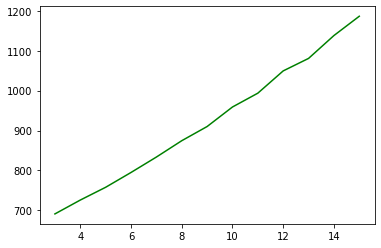

n_components with minimum perplexity: 3


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(count_vectorizer, start=10, end=30, max_iter=5, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(count_vectorizer)
        iter_num.append(i)
        pv = lda.perplexity(count_vectorizer)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(feat_vect, start=3, end=15))